# Clean And Analyze Employee Exit Surveys:
In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

## Introduction
In this Project, we will try to answer some question:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

let's start by exploring our data
## Data dictionary

#### DETE
* __ID__ - An id used to identify the participant of the survey.
* __SeparationType__ - The reason why the person's employment ended.
* __Cease Date__ - The year or month the person's employment ended.
* __DETE Start Date__ - The year the person began employment with the DETE.

### TAFE
* __Record ID__ - An id used to identify the participant of the survey.
* __Reason for ceasing employment__ - The reason why the person's employment ended.
* __LengthofServiceOverall. Overall Length of Service at Institute (in years)__ - The length of the person's employment (in years).

In [592]:
#import libraries
import pandas as pd
import numpy as np
#read data 
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")
#info about data
print('DETE:')
dete_survey.info()
dete_survey.head(5)
print(dete_survey.isnull().sum())
print('\n\n')

print('TAFE:')
tafe_survey.info()
tafe_survey.head(5)
print(tafe_survey.isnull().sum())

DETE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work e

## First impression
There are amount of none values across our datasets, some of them can be explained by reasoning and surveying about reasons why.
others can be in applicable in some cases, more investigation shall be done.
There are columns that can be combined to form one column, that will help to reduce null values as well as getting grasp of the data.

### Other observations:
* The <mark>dete_survey</mark> dataframe contains <mark>'Not Stated'</mark> values that indicate values are missing, but they aren't represented as <mark>NaN</mark>.
* Both the <mark>dete_survey</mark> and <mark>tafe_survey</mark> dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## First Steps
To start, we'll handle the first two issues.

In [593]:
#change 'Not Stated' to NaN
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')
#drop some columns that won't be used in our analysis
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

### Reasoning: 
Changing <mark>'Not Stated'</mark> to <mark>NaN</mark> will help as define missing values across our data uniformally, also using it across numrical values with our functions.

Dropping irrelevant data to the questions we want to answer (Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Equalize column names
Each dataframe contains many of the same columns, but the column names are different.
Because we eventually want to combine them, we'll have to standardize the column names

In [594]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.replace('\s+','_').str.strip()
#check changes
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [595]:
tafe_column_mapping={'Record ID': 'id','CESSATION YEAR': 'cease_date',
                     'Reason for ceasing employment': 'separationtype',
                     'Gender. What is your Gender?': 'gender',
                     'CurrentAge. Current Age': 'age',
                     'Employment Type. Employment Type': 'employment_status',
                     'Classification. Classification': 'position',
                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated=tafe_survey_updated.rename(tafe_column_mapping, axis='columns')
#check changes
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Filtering the data
Next, let's remove more of the data we don't need.

Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

For this project, we'll only analyze survey respondents who resigned, so their <mark>separationtype</mark> column contains the string 'Resignation'.

In <mark>dete_survey_updated</mark> dataframe contains multiple separation types with the string 'Resignation':
* Resignation-Other reasons
* Resignation-Other employer
* Resignation-Move overseas/interstate

we'll have to account for each of these variations so we don't unintentionally drop data!

### Unique values in <mark>seperationtype</mark>
let's review the unique values in the separationtype column in both dete_survey_updated and tafe_survey_updated

In [596]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [597]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [598]:
#selecting resignation only 
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

### Check
let's check we are left only with Resignation seperation.  

In [599]:
tafe_resignations['separationtype'].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

In [600]:
dete_resignations['separationtype'].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

we are left with resignation reasons only to help us answer the targeted question.
null values are low in volume dropping them will be insignificant in our analysis.

## Verify the data
Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge)

In this step, we'll focus on verifying that the years in the <mark>cease_date</mark> and <mark>dete_start_date</mark> columns make sense. 

* Since the <mark>cease_date</mark> is the last year of the person's employment and the <mark>dete_start_date</mark> is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the <mark>dete_start_date</mark> was before the year 1940.

In [601]:
#exploring cease date survey
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [602]:
#extracting cease year date survey
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"([1-2][0-9]{3})",expand=False)
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)
dete_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

 2014.0     22
 2013.0    146
 2012.0    129
 2010.0      2
 2006.0      1
NaN         11
Name: cease_date, dtype: int64

In [603]:
#exploring cease tafe survey
tafe_resignations["cease_date"].value_counts(dropna=False).sort_index(ascending=False)

 2013.0     55
 2012.0     94
 2011.0    116
 2010.0     68
 2009.0      2
NaN          5
Name: cease_date, dtype: int64

In [604]:
#boxplot = dete_resignations.boxplot(column=['cease_date'])
#boxplot = tafe_resignations.boxplot(column=['cease_date'])

for cease_date, there aren't out of usual years, except we got some NaN values we will leave them for now. 

## Create a new column
Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

<mark>tafe_resignations</mark> already contains a "service" column, which we renamed to <mark>institute_service</mark>. In order to analyze both surveys together, we'll have to create a corresponding <mark>institute_service</mark> column in <mark>dete_resignations</mark>.


In [605]:
# creating institute_service in dete 
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
# exploring service duration 
dete_resignations["institute_service"].value_counts().sort_index(ascending=False)

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64

## Identify dissatified employees
Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.
1. tafe_survey_updated:
    * <mark>Contributing Factors. Dissatisfaction</mark>
    * <mark>Contributing Factors. Job Dissatisfaction</mark>
2. dete_survey_updated:
    * <mark>job_dissatisfaction</mark>
    * <mark>dissatisfaction_with_the_department</mark>
    * <mark>physical_work_environment</mark>
    * <mark>lack_of_recognition</mark>
    * <mark>lack_of_job_security</mark>
    * <mark>work_location</mark>
    * <mark>employment_conditions</mark>
    * <mark>work_life_balance</mark>
    * <mark>workload</mark>
    
If an employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [606]:
#exploring tafe_survey_updated dissatified employees
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False).sort_index(ascending=False))

Contributing Factors. Dissatisfaction      55
-                                         277
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64 

Job Dissatisfaction     62
-                      270
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [607]:
#exploring dete_survey_updated dissatified employees
print(dete_survey_updated['job_dissatisfaction'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['dissatisfaction_with_the_department'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['physical_work_environment'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['lack_of_recognition'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['lack_of_job_security'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['work_location'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['employment_conditions'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['work_life_balance'].value_counts(dropna=False).sort_index(ascending=False),'\n')
print(dete_survey_updated['workload'].value_counts(dropna=False).sort_index(ascending=False),'\n')

True      89
False    733
Name: job_dissatisfaction, dtype: int64 

True      61
False    761
Name: dissatisfaction_with_the_department, dtype: int64 

True      16
False    806
Name: physical_work_environment, dtype: int64 

True      57
False    765
Name: lack_of_recognition, dtype: int64 

True      28
False    794
Name: lack_of_job_security, dtype: int64 

True      27
False    795
Name: work_location, dtype: int64 

True      34
False    788
Name: employment_conditions, dtype: int64 

True     217
False    605
Name: work_life_balance, dtype: int64 

True      87
False    735
Name: workload, dtype: int64 



In [608]:
#update values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe survey
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True

In [609]:
# updating values tafe_resignations
cols=['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
dissatisfied=tafe_resignations[cols].applymap(update_vals)
# create tafe dissatisfied column
tafe_resignations["dissatisfied"]=dissatisfied.any(axis=1,skipna=False)
# create a copy
tafe_resignations_up=tafe_resignations.copy()
# count od dissatisfied 
print(tafe_resignations_up["dissatisfied"].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


In [610]:
# updating values dete_resignations
cols=['job_dissatisfaction',
      'dissatisfaction_with_the_department',
      'physical_work_environment',
      'lack_of_recognition',
     'lack_of_job_security',
     'work_location',
     'employment_conditions',
     'work_life_balance',
     'workload']
dissatisfied=dete_resignations[cols]
# create tafe dissatisfied column
dete_resignations["dissatisfied"]=dissatisfied.any(axis=1,skipna=False)
#create a copy
dete_resignations_up=dete_resignations.copy()
# count od dissatisfied 
print(dete_resignations_up["dissatisfied"].value_counts(dropna=False))

False    162
True     149
Name: dissatisfied, dtype: int64


we classified the employees whether the reason of exit is dissatisfaction or not.

## Combine the data
Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column.

In [611]:
# distinguish the two surveys
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [612]:
# combining the two dataframes
combined=pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [613]:
#dropping columns with less than 500 non null values
combined_updated=combined.dropna(thresh=500,axis=1).copy()

we combined our surveys in one dataframe ro continue our analysis, dropping columns with less than 500 non null values aqs well.

## Clean the service column
We're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the institute_service column.

To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

Let's categorize the values in the <mark>institute_service</mark> column using the definitions above.

In [614]:
#unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


we have some years encoded as ranges, we will deal with that to clean it up.

In [615]:
#extract service years values 
combined_updated['institute_service_yrs']=combined_updated['institute_service'].astype('str').str.extract(r"(\d+)",expand=False).astype(float)
print(combined_updated["institute_service_yrs"].value_counts(dropna=False))

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service_yrs, dtype: int64


In [616]:
# career stage mapping function
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return 'New'
    elif val<7:
        return 'Experienced'
    elif val<11:
        return 'Established'
    else:
        return 'Veteran'   

In [617]:
# categorigizing career level
combined_updated['service_cat']=combined_updated["institute_service_yrs"].apply(career_stage)
combined_updated['service_cat'].value_counts().sort_index(ascending=False)

Veteran        136
New            193
Experienced    172
Established     62
Name: service_cat, dtype: int64

As the article suggested that career stage is a better approach for analysis than age regarding employees.
we classified our employees according to our stages, to continue further with our analysis.

## Initial Analysis
Now, let's finally do our first piece of analysis!

In [618]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

we will replace the NaN values with the most dominanted dissatisfaction value which is False.

In [619]:
#fill NaN values
combined_updated["dissatisfied"]=combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

now let's aggregate our values and calculate the percentage of dissatisfied employees in each <mark>service_cat</mark> group.

Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees.

In [620]:
pivot=combined_updated.pivot_table(index="service_cat", values="dissatisfied")
pivot

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


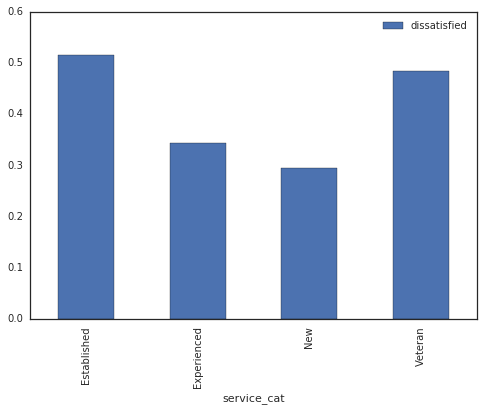

In [621]:
pivot.plot(kind='bar')

From the initial analaysis, as years of experience increases we can say  the dissatisfaction level increases. Which can be explained roughly as years comes people tend to feel more stuck and can't grow easy as before next to more family responsibilities.
further analysis is needed to dig more into the reasons why that happens.
the largest dissatisfied category is Established employees (7-11 yrs of experience) with ~50% disatisification level. 

## More Analysis
### Age
let's explore age groups in our dissatisified employees, and do more analysis on our data.

In [622]:
#unique age groups
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

most of our ages are splitted into 5 years interval, we will map our age groups consistently across our data.

for the group of <mark>20 or younger</mark> we will combine them to our youngest group 20-25. we will have similar approach with 56 or older we will combine it with 56-60. for 61 or older will be limited to 65. (actual retirement age in Australia is 67 years old) 

we can fill our NaN Values with the mean age of our age distribution, or drop them in order not to change our distribution. 

In [623]:
#combine same age groups
age_mapping={'21-25': '20-25',
             '26-30': '26-30',
             '31-35': '31-35',
             '36-40': '36-40',
             '41-45': '41-45',
             '46-50': '46-50',
             '51-55': '51-55',
             '56-60': '56-60',
             '61-65': '61-65',
             '20 or younger': '20-25',
             '21  25': '20-25',
             '26  30': '26-30',
             '31  35': '31-35',
             '36  40': '36-40',
             '41  45': '41-45',
             '46  50': '46-50',
             '56 or older': '56-60',
             '61 or older': '61-65'
            }
combined_updated['age']=combined_updated['age'].map(age_mapping)
#check our mapping
combined_updated['age'].value_counts(dropna=False)

41-45    93
46-50    81
36-40    73
20-25    72
51-55    71
26-30    67
31-35    61
56-60    55
NaN      55
61-65    23
Name: age, dtype: int64

In [624]:
#fill NaN values with mean age
#x=combined_updated['age'].str.extract(r"(\d+)",expand=False).astype(float).mean()
#print(int(x))
#combined_updated["age"]=combined_updated["age"].fillna('36-40')
#combined_updated['age'].value_counts(dropna=False)

In [625]:
combined_updated = combined_updated[combined_updated['age'].notna()]
combined_updated['age'].value_counts(dropna=False)

41-45    93
46-50    81
36-40    73
20-25    72
51-55    71
26-30    67
31-35    61
56-60    55
61-65    23
Name: age, dtype: int64

In [626]:
# plot our distribution of age groups
combined_updated['age']=combined_updated['age'].str.extract(r"(^\d{2})",expand=False).astype(float)
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
20.0    72
51.0    71
26.0    67
31.0    61
56.0    55
61.0    23
Name: age, dtype: int64

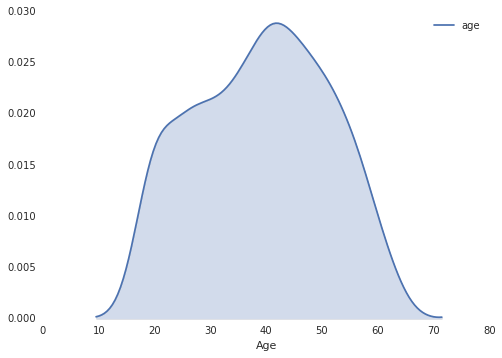

In [630]:
import seaborn as sns    
import matplotlib.pyplot as plt
sns.set_style("white")
sns.kdeplot(combined_updated["age"],shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom= True)

most of the exiting employees are around 45 years old as shown in the above plot. 

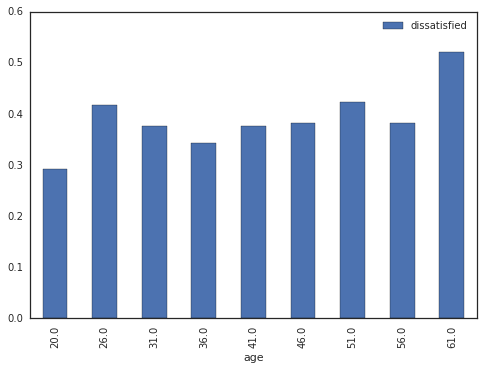

In [633]:
pivot=combined_updated.pivot_table(index="age", values="dissatisfied")
pivot.plot(kind='bar')

Age across the dissatisified employess is almost uniform, however people near retirement are mostly dissatisied among the exit employees.
which can be explained in part as they mainly favor family than work.